In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
import PIL
import scipy as sp

def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))
    return - probs.dot(np.log2(probs))




5.476912058602023


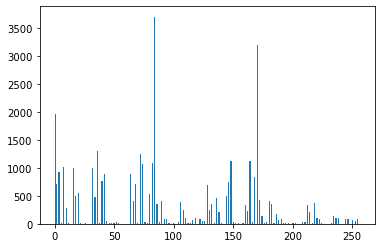

In [5]:

Photo=PIL.Image.open("photo.bmp")
Photo=Photo.resize((512,512))
Photo.show()
PhotoConverted=Photo.convert(mode="1",dither=PIL.Image.FLOYDSTEINBERG)
PhotoConverted.show()
a = np.asarray(PhotoConverted)


Raw=[]
c=0
d=0
for x in a:
    for y in x:
        c+=1
        d+=y
        d=d<<1
        if c == 7:
            c=0
            Raw.append(d)
            d=0







figImage , his = plt.subplots()
bins=255

his.hist(Raw,bins,range=[0,256])



print(entropy(Raw))





In [7]:


p=1
q=1
A=np.array([[1,p],[q,((p*q)+1)]])
PhotoInPost=np.array(a)
PhotoAfterPost=np.array(PhotoInPost)

for i in range(10):
    for x in range(512):
        for y in range(512):
            temp=np.array([[x],[y]])
            b=(A @ temp)
            b[[0],[0]]=math.fmod(b[[0],[0]], 512)
            b[[1],[0]]=math.fmod(b[[1],[0]], 512)
            PhotoAfterPost[[b[[0],[0]]],[b[[1],[0]]]]=PhotoInPost[[x],[y]]
    PhotoInPost=PhotoAfterPost       
#PhotoAfterPost=Photo.convert(mode="1")
#print(PhotoAfterPost)        

DisplayImg=PIL.Image.fromarray(PhotoAfterPost,mode="1")
DisplayImg.show()



    


Ilość cyfr: 37449
6.627723330452991


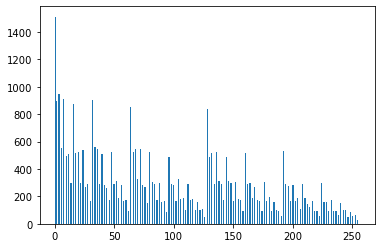

In [8]:



Data=[]
c=0
d=0
for x in PhotoAfterPost:
    for y in x:
        c+=1
        d+=y
        d=d<<1
        if c == 7:
            c=0
            #print(str(d)+'\n')
            Data.append(d)
            d=0

#print(Data)
DataToSave=np.array(Data)
output_file = open('file.bin', 'wb')
DataToSave.tofile(output_file)
output_file.close()

print("Ilość cyfr:",len(Data))


figImage , his = plt.subplots()
bins=255

his.hist(Data,bins,range=[0,256])


print(entropy(Data))


Ilość cyfr: 112347
Surowe Dane ze źródła przed postprocesingiem:
5.957643315756922
Dane po całym procesie
6.999146855477718


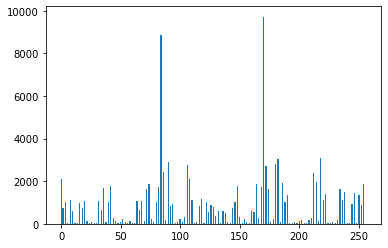

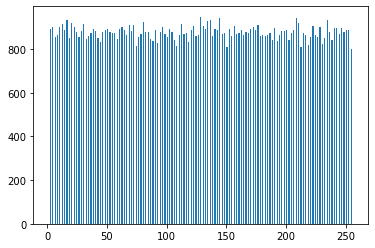

In [12]:
###100 000 numbers generator
Data=[]
Raw=[]
for counter in range(3):
    PhotoName=("photo",str(counter),".png")
    PhotoName="".join(PhotoName)
    Photo=PIL.Image.open(PhotoName)
    Photo=Photo.resize((512,512))
    #Photo.show()
    PhotoConverted=Photo.convert(mode="1",dither=PIL.Image.FLOYDSTEINBERG)
    #PhotoConverted.show()
    a = np.asarray(PhotoConverted)


  
    c=0
    d=0
    for x in a:
        for y in x:
            c+=1
            d+=y
            d=d<<1
            if c == 7:
                c=0
                Raw.append(d)
                d=0




    p=1
    q=1
    A=np.array([[1,p],[q,((p*q)+1)]])
    PhotoInPost=np.array(a)
    PhotoAfterPost=np.array(PhotoInPost)

    for i in range(10):
        for x in range(512):
            for y in range(512):
                temp=np.array([[x],[y]])
                b=(A @ temp)
                b[[0],[0]]=math.fmod(b[[0],[0]], 512)
                b[[1],[0]]=math.fmod(b[[1],[0]], 512)
                PhotoAfterPost[[b[[0],[0]]],[b[[1],[0]]]]=PhotoInPost[[x],[y]]
        PhotoInPost=PhotoAfterPost       
    #PhotoAfterPost=Photo.convert(mode="1")
    #print(PhotoAfterPost)        

    DisplayImg=PIL.Image.fromarray(PhotoAfterPost,mode="1")
    #DisplayImg.show()



    
    c=0
    d=0
    for x in PhotoAfterPost:
        for y in x:
            c+=1
            d+=y
            d=d<<1
            if c == 7:
                c=0
                #print(str(d)+'\n')
                Data.append(d)
                d=0

#print(Data)
DataToSave=np.array(Data)
output_file = open('file.bin', 'wb')
DataToSave.tofile(output_file)
output_file.close()

print("Ilość cyfr:",len(Data))
print("Surowe Dane ze źródła przed postprocesingiem:")
figImage , his = plt.subplots()
bins=255

his.hist(Raw,bins,range=[0,256])


print(entropy(Raw))

print("Dane po całym procesie")


figImage , his = plt.subplots()
bins=255

his.hist(Data,bins,range=[1,256])

print(entropy(Data))

